# Lab 4
The final result is attached at the beggining :)

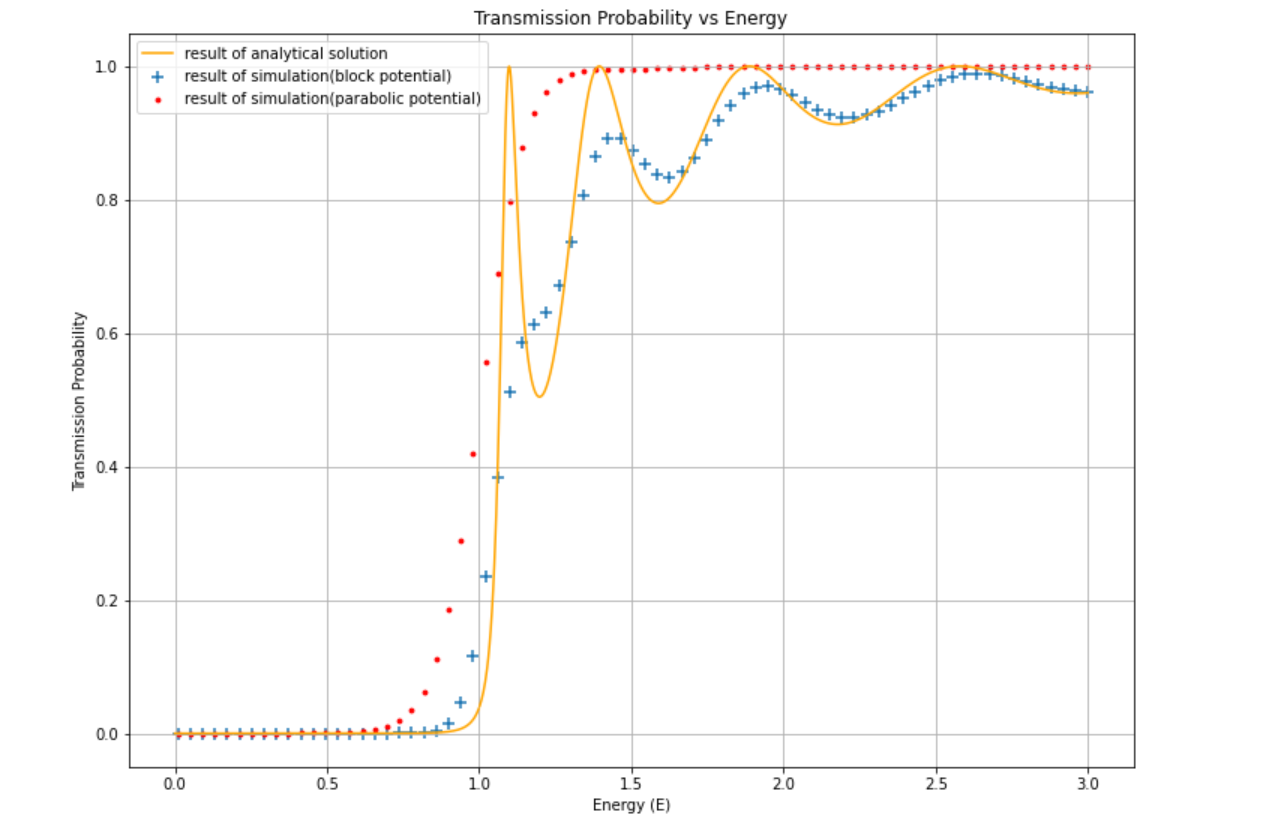

In [256]:
from IPython.display import Image, display
display(Image(filename='LAB4_result.png'))

# Question (a)

**Reference**:Introduction to Quantum Mechanics, 2rd Edition, David J. Griffiths P78-82  
The question in text is a well instand of a barrier, and final solution is close to this problem.

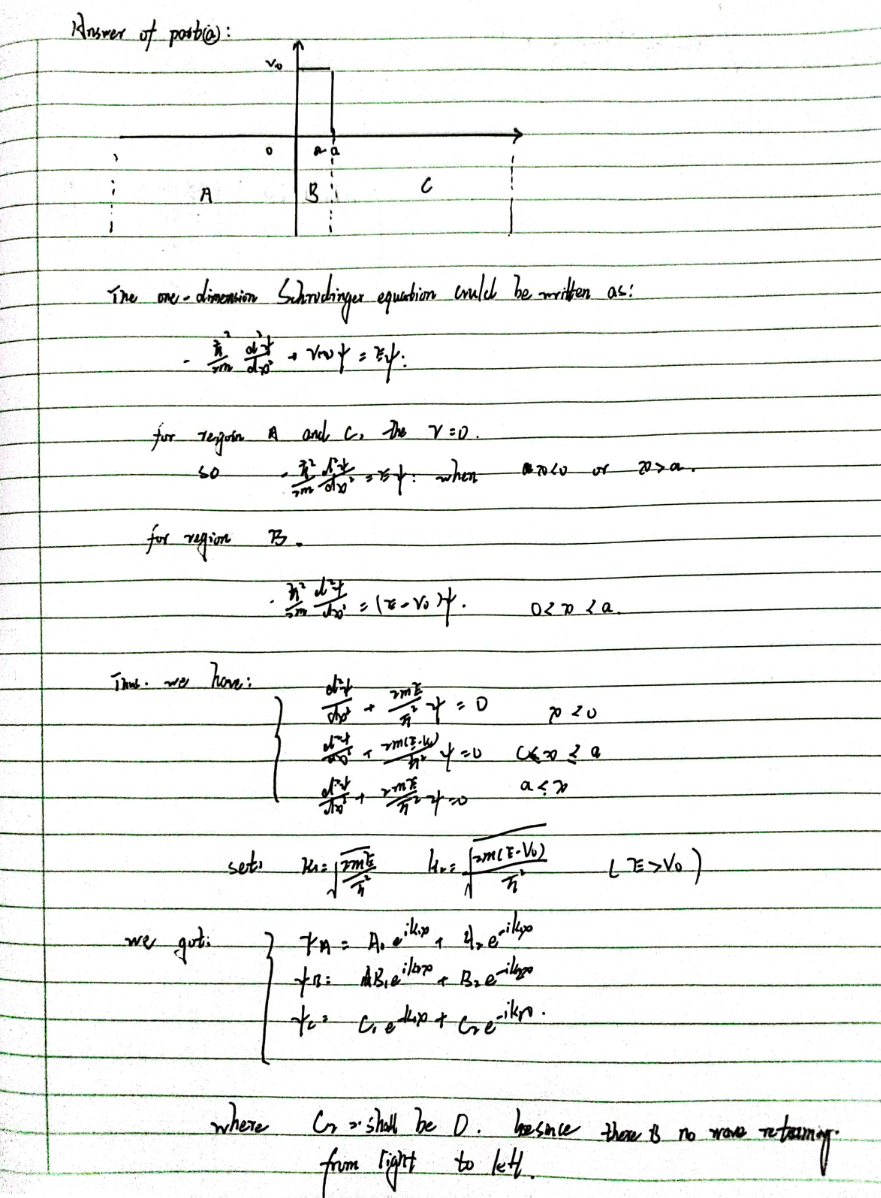

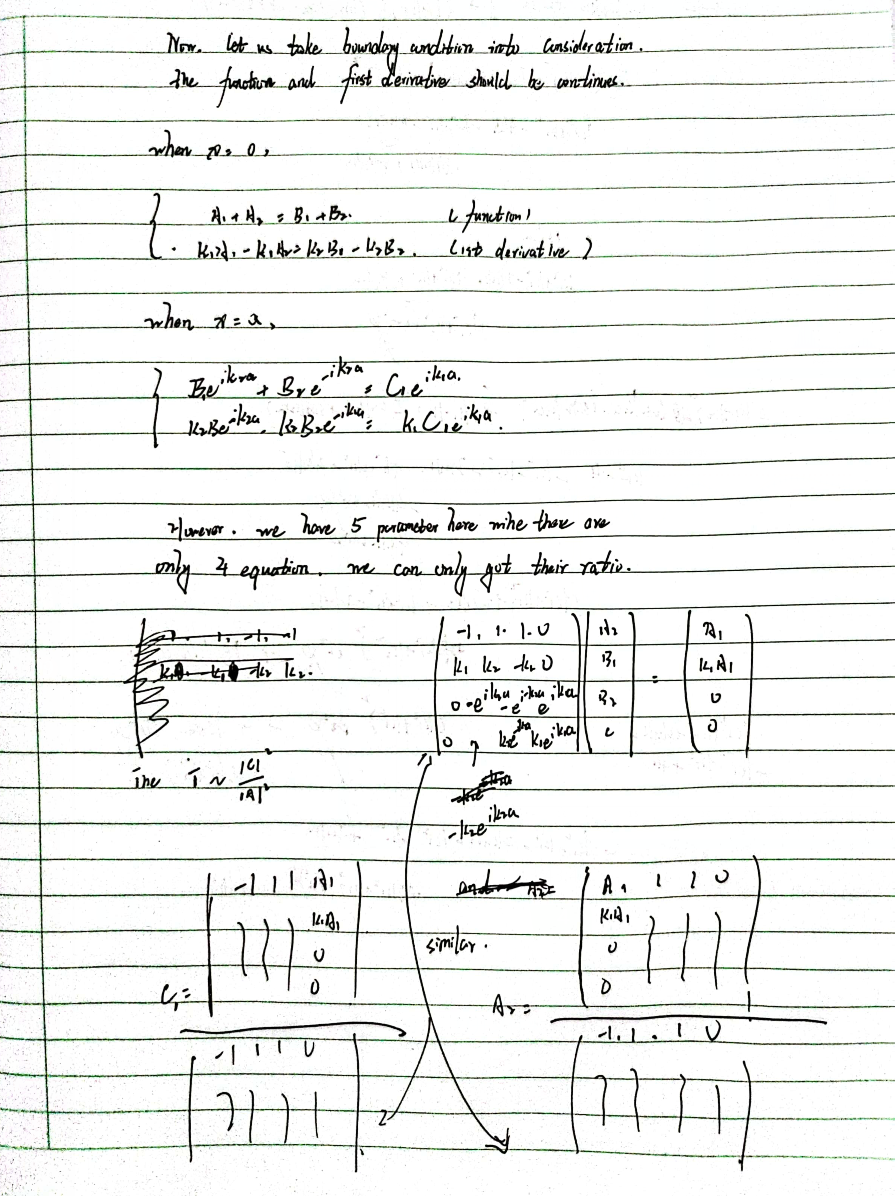

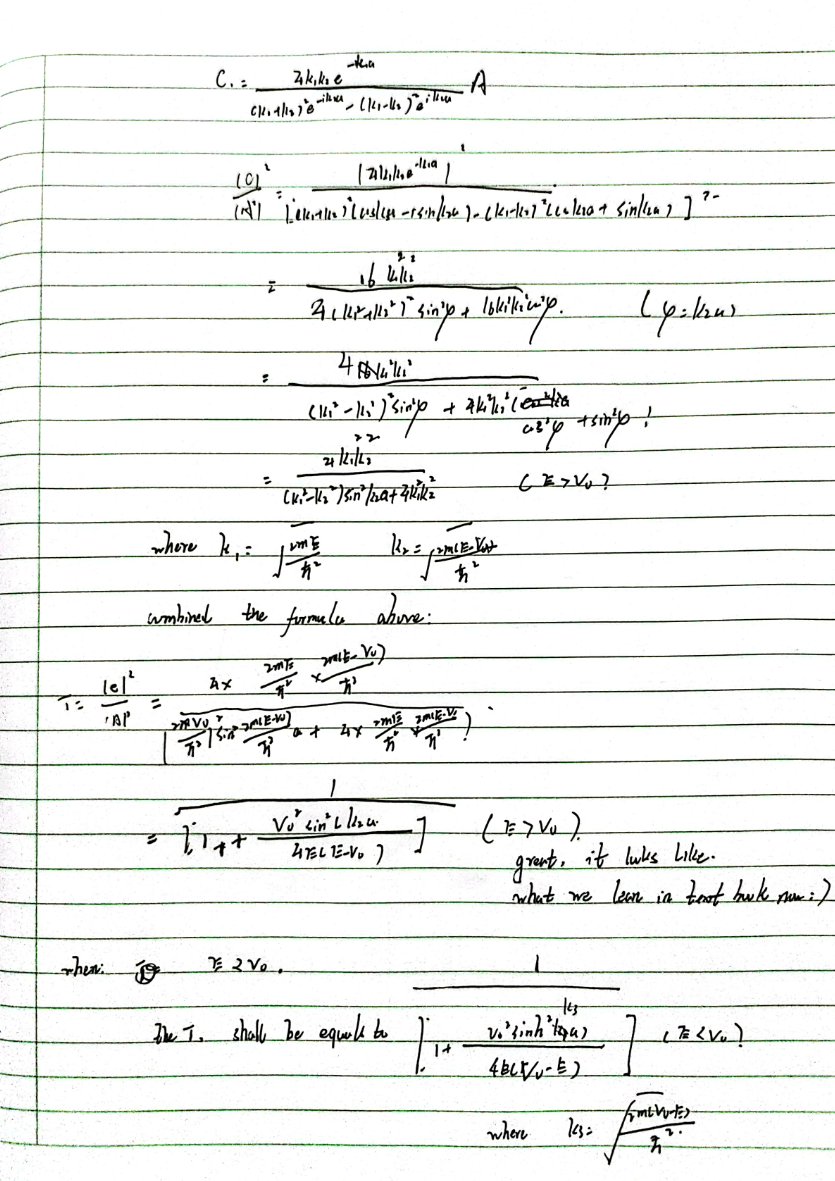

In [252]:
display(Image(filename='LAB4_Q1_1.png'))
display(Image(filename='LAB4_Q1_2.png'))
display(Image(filename='LAB4_Q1_3.png'))

The following cell is to Plot T as a function of E from 0 to 2 eV  

We use $\hbar = 1$, $m = 1$ in this case

As this discussed in the problem

$\frac{\hbar^2}{2m a^2} = \frac{1}{100}eV$

Thus  $a = \sqrt{50}$

The following calculation(a) (b) (c) will base on these result



C:\Users\24442\AppData\Local\Temp/ipykernel_38320/1619132399.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  result = 1/(1+A/B)
C:\Users\24442\AppData\Local\Temp/ipykernel_38320/1619132399.py:28: RuntimeWarning: invalid value encountered in scalar divide
  result = 1/(1+A/B)
C:\Users\24442\AppData\Local\Temp/ipykernel_38320/1619132399.py:16: RuntimeWarning: invalid value encountered in scalar divide
  result = 1/(1+A/B)


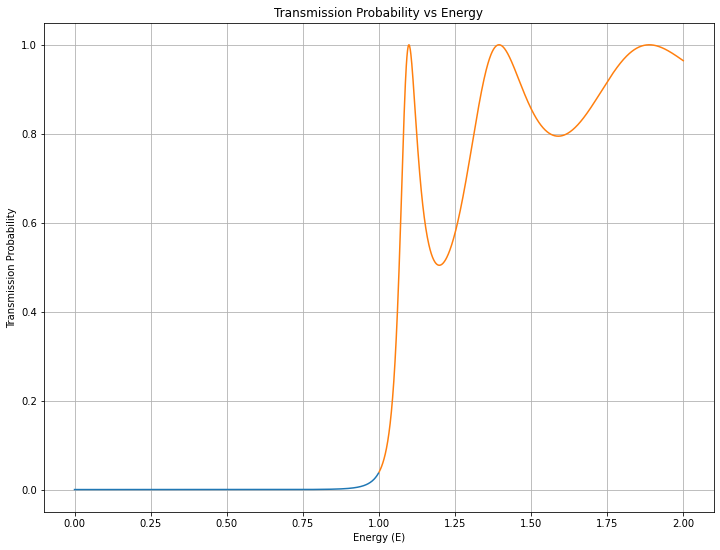

In [6]:
from scipy.constants import k,h,e,c
import math
import numpy as np
import matplotlib.pyplot as plt

"""
This cell is used to Plot T as a function of E from 0 to 2 eV.
according to the result we derivative
"""
#T when E>V0
def T2(E):
    V0 = 1
    hbar = 1
    m = 1
    a = pow(50,0.5)
    k = pow(2*m*(E-V0),0.5)
    temp = math.sin(k*a)
    A = V0**2*temp**2
    B = 4*E*(E-V0)
    result = 1/(1+A/B)
    return result

#T when E<V0
def T1(E):
    V0 = 1
    hbar = 1
    m = 1
    a = pow(50,0.5)
    k = pow(2*m*(V0-E),0.5)
    temp = math.sinh(k*a)
    A = V0**2*temp**2
    B = 4*E*(V0-E)
    result = 1/(1+A/B)
    return result

energy_values = np.linspace(0, 1, 1000)
energy_values2 = np.linspace(1, 2, 1000)

# Calculate transmission probabilities for each energy value
transmission_probabilities = [T1(E) for E in energy_values]
transmission_probabilities2 = [T2(E) for E in energy_values2]

plt.figure(figsize=(12, 9))


# Plot the results
plt.plot(energy_values, transmission_probabilities)
plt.plot(energy_values2, transmission_probabilities2)
plt.xlabel('Energy (E)')
plt.ylabel('Transmission Probability')
plt.title('Transmission Probability vs Energy')
plt.grid(True)
plt.show()

# Question (b)

Reference: https://florestan-eusebius.github.io/2021/02/23/Crank-Nicolson-Method.html

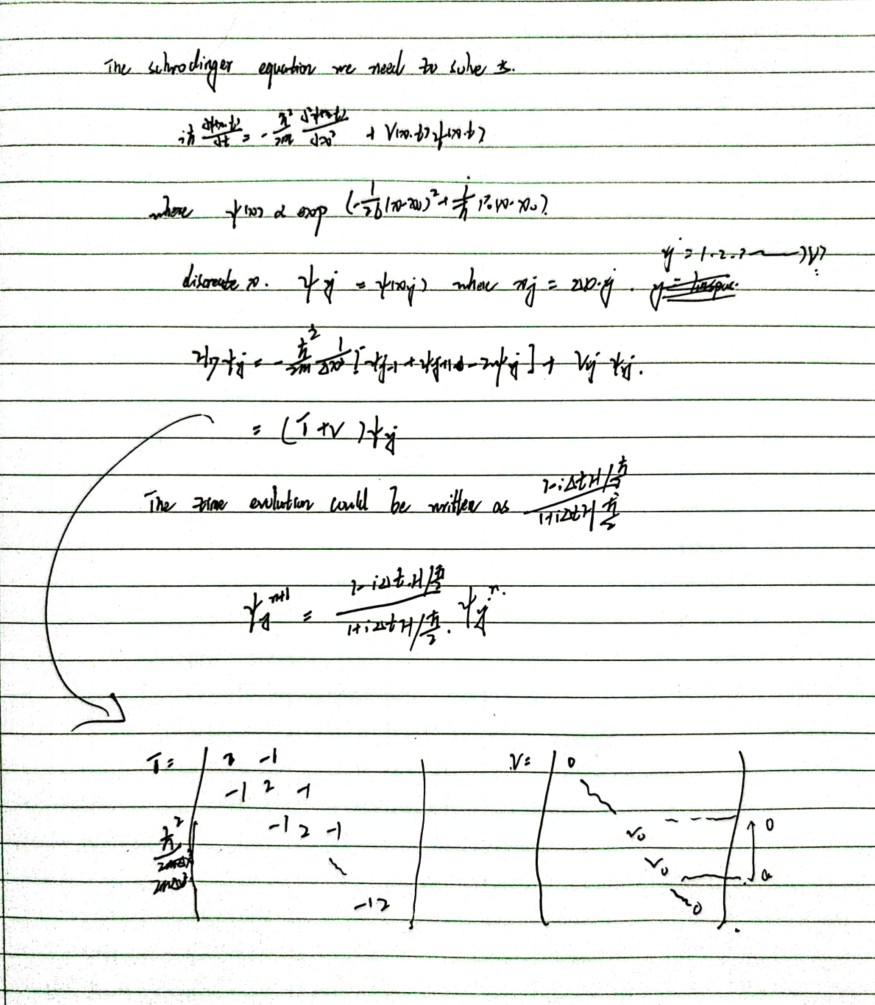

In [250]:
from IPython.display import Image, display
display(Image(filename='LAB4_Q2_1.png'))

Here are the structure of answer of question b:  
+ One cell is used to generate $\phi$ and test it by visualize the packet.
+ One cell is used to generate and test Matrix T and V, which will be used later
+ Onc cell is used to generate Crank-Nicholson method function based on the 

$$H_{D} = (T+V)$$  
$$\phi_{j}^{n+1} = \frac{1-i\Delta tH_{D}/2\hbar}{1+i\Delta tH_{D}/2\hbar}\phi_{j}^{n}$$

+ Two cells are used to make plots to see the wavepacket
+ One cell is to rewrite the process as a function with E as input and T as output, thus we can plot E vs T
+ One cell is used to calculate 
+ One cell is used to plot Transmission Probability vs Energy according to the calculation

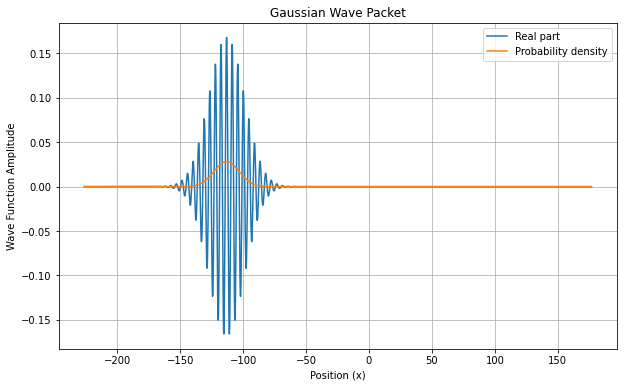

In [219]:
"""
This cell is used to def psi, and define parameter
"""

"""
The paramaete are defined at the beginning so
we dont need to define it in each function
"""
V0 = 1
hbar = 1
m = 1
a = pow(50,0.5)
p0 = pow(2*m*V0,0.5)
sigma= 2*a
x0 = -16*a
x_list = np.linspace(x0-16*a,a+24*a,2000)
delta_x = x_list[1]-x_list[0]
delta_t = 0.1

#fuction of wave pocket
def psi(x,p):
    A = -((x-x0)**2/(2*sigma**2))
    B = 1j*p*(x-x0)/hbar
    result = np.exp(A+B)
    coff = pow(2*math.pi*sigma**2,1/4)
    coff = 1/coff
    return coff*result

#list saving the phi j
packet = [psi(x,p0) for x in x_list]


# Plotting the wave packet
plt.figure(figsize=(10, 6))
plt.plot(x_list, np.real(packet), label='Real part')
#plt.plot(x_list, np.imag(wavepkt), label='Imaginary part')
plt.plot(x_list, np.abs(packet)**2, label='Probability density')

# Adding labels and title
plt.xlabel('Position (x)')
plt.ylabel('Wave Function Amplitude')
plt.title('Gaussian Wave Packet')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()



[[ 24.59834411 -12.29917205   0.           0.           0.        ]
 [-12.29917205  24.59834411 -12.29917205   0.           0.        ]
 [  0.         -12.29917205  24.59834411 -12.29917205   0.        ]
 [  0.           0.         -12.29917205  24.59834411 -12.29917205]
 [  0.           0.           0.         -12.29917205  24.59834411]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


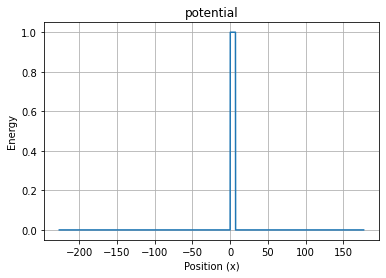

In [230]:
"""
Matrix generate zone
T and V are generated and tested in this cell
"""
#For matrix T
def T_generator(packet):
    N = len(packet)
    T = np.zeros((N,N))
    for i in range(1,N-1):
        T[i][i] = 2
        T[i][i-1] = -1
        T[i][i+1] = -1
    #for first row
    T[0][0] = 2
    T[0][1] = -1
    
    #for last row
    T[N-1][N-1] = 2
    T[N-1][N-2] = -1
    
    T = hbar**2/(2*m*delta_x**2)*T
    
    return T

#For matrix V when it is square potential
def V_generator1(packet):
    N = len(packet)
    V = np.zeros((N,N))
    for i in range(N):
        if x_list[i] >0:
            if x_list[i] <a:
                V[i][i] = V0
    return V
"""
Testing Zone
make sure V AND T is correct
"""
#Test zone
A_list = (1,2,3,4,5)
B_list = T_generator(A_list)
print(B_list)

C_list = V_generator1(packet)
print(C_list)

potential = []
for i in range(len(C_list)):
    potential.append(C_list[i][i])
    
plt.plot(x_list, potential)

# Adding labels and title
plt.xlabel('Position (x)')
plt.ylabel('Energy')
plt.title('potential')
plt.grid(True)

# Display the plot
plt.show()


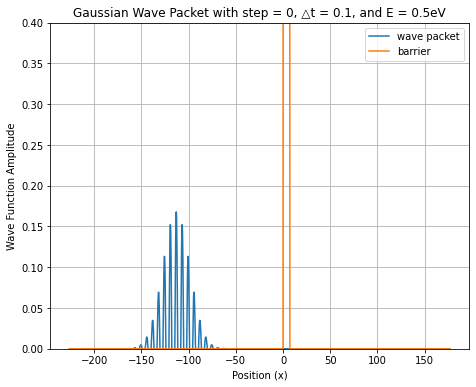

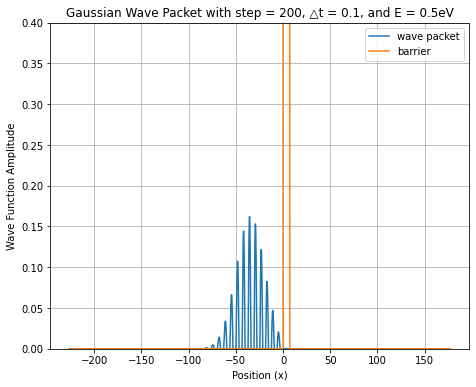

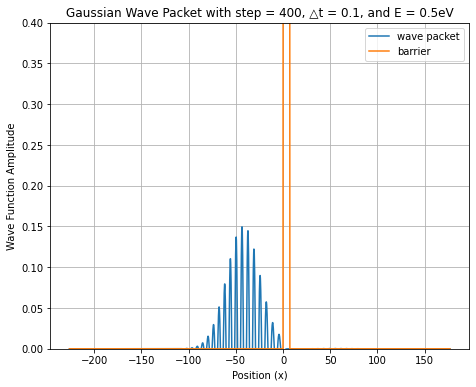

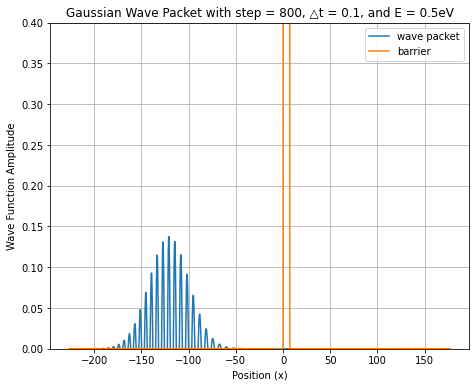

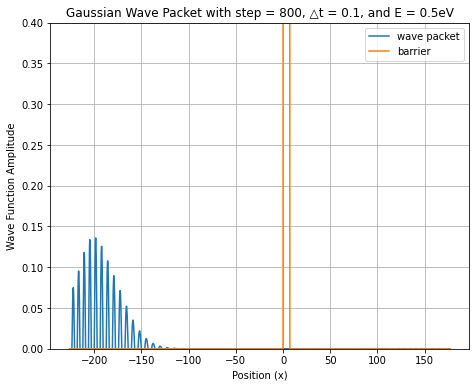

In [258]:
"""
Crank-Nicholson method function
Application and visualization
"""

def CN(packet,steps):
    N = len(packet)
    T = T_generator(packet)
    V = V_generator1(packet)
    H = T+V
    I = np.identity(N)
    # Numerators of evolution factor
    temp1 = I - 1j*delta_t/(hbar/2)*H
    # denominator of evolution factor
    temp2 = I + 1j*delta_t/(hbar/2)*H
    temp2 = np.linalg.inv(temp2)
    time_factor = np.matmul(temp2,temp1)
    step = 0
    for step in range(steps):
        packet = time_factor @ packet
    #print(step)
    return packet

def visualization(packet,n):
    
    plt.figure(figsize=(7.5,6))
    plt.plot(x_list, np.real(packet), label='wave packet')
    #plt.plot(x_list, np.imag(wavepkt), label='Imaginary part')
    #plt.plot(x_list, np.abs(packet)**2, label='Probability density')
    plt.plot(x_list, potential, label='barrier')

    # Adding labels and title
    plt.xlabel('Position (x)')
    plt.ylabel('Wave Function Amplitude')
    plt.ylim(0,0.4)
    plt.title(f'Gaussian Wave Packet with step = {n}, △t = {delta_t}, and E = {E}eV')
    plt.legend()
    plt.grid(True)

    
E = 0.5
p = pow(2*m*E,0.5)
packet = [psi(x,p) for x in x_list]    

packet0 = CN(packet,0)
visualization(packet0,0)

packet1 = CN(packet,200)
visualization(packet1,200)

packet3 = CN(packet,400)
visualization(packet3,400)

packet4 = CN(packet,600)
visualization(packet4,800)

packet5 = CN(packet,800)
visualization(packet5,800)

When E = 0.5Ev, the wavepacket behavior like it reflect directly.

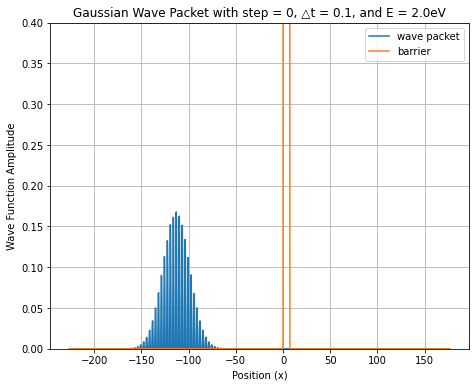

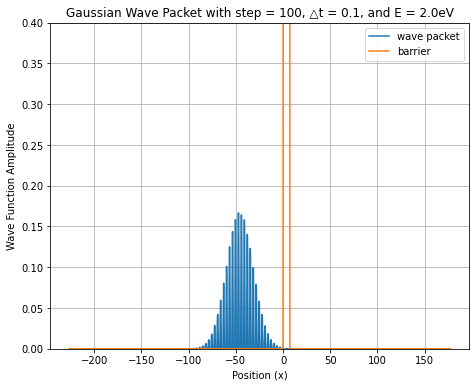

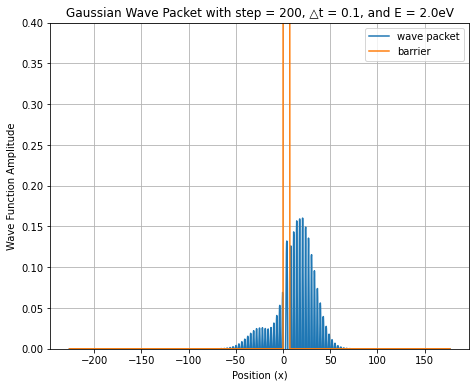

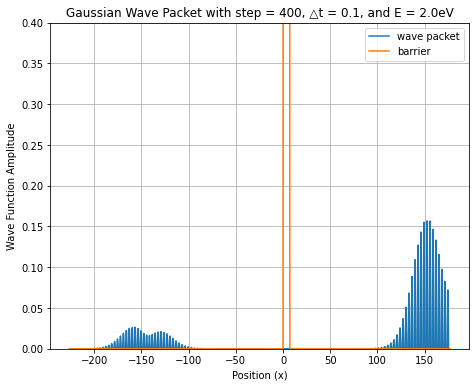

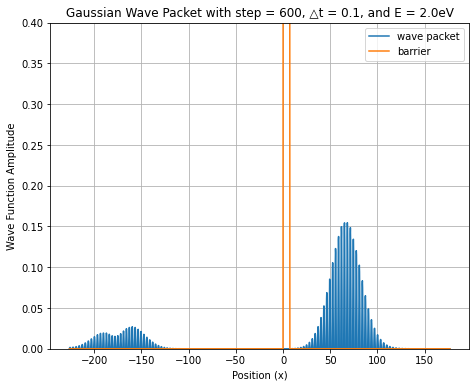

In [268]:
E = 2.0
p = pow(2*m*E,0.5)
packet = [psi(x,p) for x in x_list]    

packet0 = CN(packet,0)
visualization(packet0,0)

packet1 = CN(packet,100)
visualization(packet1,100)

packet3 = CN(packet,200)
visualization(packet3,200)

packet4 = CN(packet,400)
visualization(packet4,400)

packet5 = CN(packet,600)
visualization(packet5,600)

When E = 2eV, part of it are reflected, and another significant part of it transimited successfully.  
It is close to what we calculated in problem a, let us move on.

The following is to rewrite the process as a function  
with E as input and T as output, thus we can plot E vs T

In [265]:
"""
The following is to rewrite the process as a function  
with E as input and T as output, thus we can plot E vs T
"""
def transmission_calculator(E):
    p = pow(2*E*m,0.5)
    v = p/m
    # The step needed is change by E
    # I did not calculate the analytic solution
    # I try a lot of time and the formula below can make sure packetwill
    # not reflect from the boundary when 0.1<E<2
    step_need = (-0.6*x0)/(v*delta_t)
    steps = int(step_need)
    
    #cut_off_point = 0
    for i in range(len(x_list)):
        if x_list[i]> a:
            cut_off_point = i
            #print(cut_off_point)
            break
    
    #use CN method here 
    packet = [psi(x,p) for x in x_list]
    packet = CN(packet,steps)
    left_packet = packet[cut_off_point:]
    #total incoming energy
    In = np.array([a*a.conjugate() for a in packet]).sum() 
    In = In.real
    #total transimited energy
    T = np.array([a*a.conjugate() for a in left_packet]).sum()
    T = T.real
    T = T/In
    
    #print(f'When E equals to {E},The T equals to {T}')
    return T

transmission_calculator(2)

    

0.9630338689914767

In [266]:
"""
Calculation Zone
"""

energy_values3 = np.linspace(0.01, 3, 75)
transmission_probabilities3 = [transmission_calculator(E) for E in energy_values3]
    
#Here are the result from (a)
#I extend the interval from 2 to 3.
energy_values = np.linspace(0, 1, 1000)
energy_values2 = np.linspace(1, 3, 1000)

# Calculate transmission probabilities for each energy value
transmission_probabilities = [T1(E) for E in energy_values]
transmission_probabilities2 = [T2(E) for E in energy_values2]


C:\Users\24442\AppData\Local\Temp/ipykernel_38320/1619132399.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  result = 1/(1+A/B)
C:\Users\24442\AppData\Local\Temp/ipykernel_38320/1619132399.py:28: RuntimeWarning: invalid value encountered in scalar divide
  result = 1/(1+A/B)
C:\Users\24442\AppData\Local\Temp/ipykernel_38320/1619132399.py:16: RuntimeWarning: invalid value encountered in scalar divide
  result = 1/(1+A/B)


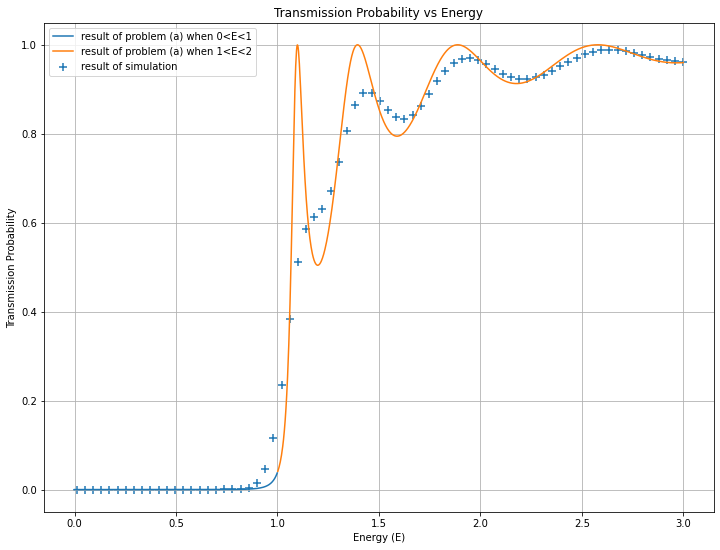

In [218]:
"""
Ploting zone of question b
"""
plt.figure(figsize=(12, 9))

# Plot the results
plt.plot(energy_values, transmission_probabilities,label = "result of problem (a) when 0<E<1")
plt.plot(energy_values2, transmission_probabilities2,label = "result of problem (a) when 1<E<2")
# Result of simulation
plt.scatter(energy_values3, transmission_probabilities3, s=80, marker='+',label = "result of simulation")

plt.xlabel('Energy (E)')
plt.ylabel('Transmission Probability')
plt.title('Transmission Probability vs Energy')
plt.grid(True)
plt.legend()
plt.show()

+ The points we simulated are quite different from the theory  
+ But the up-and-down trend remains
+ It seems that two result have crosspoint in 2.0, 3.0  
+ The result become closer when E goes infinity.

  
+ A significant cause of error is that the step_needed is changed by E
+ if steps are too more, the wave will reflect from the boundary and transmite again
+ if steps are too less, the transmission is not totally completed.
+ I try to find the relationshop of (step_needed vs E), but the result is unexpected.
+ I also try to extend the boundary so that the packet will not reflected, but it will increasw the N of the matrix and spend a lot of time to calculate singel result.


# Question (c)
Repeat the same calculation as in (b) with the parabolic potential V2. Compare and 
discuss the resul

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


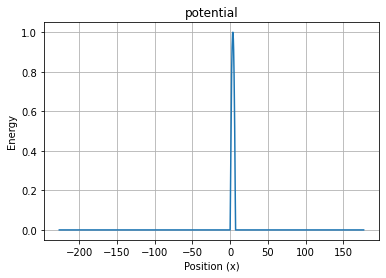

In [261]:
"""
This cell is used to change V_generator1(block) to V_generator2(parabolic).
CN method, transmission_calculator shall change accordingly.
"""

#For matrix V when it is parabolic potential
def V_generator2(packet):
    N = len(packet)
    V = np.zeros((N,N))
    for i in range(N):
        x = x_list[i]
        result = 4*V0*x*(a-x)/a**2
        if result >=0:
            V[i][i] = result
        
    return V

def CN2(packet,steps):
    N = len(packet)
    T = T_generator(packet)
    V = V_generator2(packet)
    H = T+V
    I = np.identity(N)
    # Numerators of evolution factor
    temp1 = I - 1j*delta_t/(hbar/2)*H
    # denominator of evolution factor
    temp2 = I + 1j*delta_t/(hbar/2)*H
    temp2 = np.linalg.inv(temp2)
    time_factor = np.matmul(temp2,temp1)
    step = 0
    for step in range(steps):
        packet = time_factor @ packet
    #print(step)
    return packet

def transmission_calculator2(E):
    p = pow(2*E*m,0.5)
    v = p/m
    # The step needed is change by E
    # I did not calculate the analytic solution
    # I try a lot of time and the formula below can make sure packetwill not reflect from the boundary when 0.1<E<2
    step_need = (-0.6*x0)/(v*delta_t)
    steps = int(step_need)
    
    #cut_off_point = a
    for i in range(len(x_list)):
        if x_list[i]> a:
            cut_off_point = i
            #print(cut_off_point)
            break
    
    #use CN method here 
    packet = [psi(x,p) for x in x_list]
    packet = CN2(packet,steps)
    left_packet = packet[cut_off_point:]
    In = np.array([a*a.conjugate() for a in packet]).sum() 
    In = In.real
    T = np.array([a*a.conjugate() for a in left_packet]).sum()
    T = T.real
    T = T/In
    
    #print(f'When E equals to {E},The T equals to {T}')
    return T

D_list = V_generator2(packet)
print(D_list)

potential2 = []
for i in range(len(D_list)):
    potential2.append(D_list[i][i])
    
plt.plot(x_list, potential2)

# Adding labels and title
plt.xlabel('Position (x)')
plt.ylabel('Energy')
plt.title('potential')
plt.grid(True)

# Display the plot
plt.show()

In [262]:
"""
calculation zone
"""
energy_values4 = np.linspace(0.01, 3, 75)
transmission_probabilities4 = [transmission_calculator2(E) for E in energy_values4]
print("calculation complete")

calculation complete


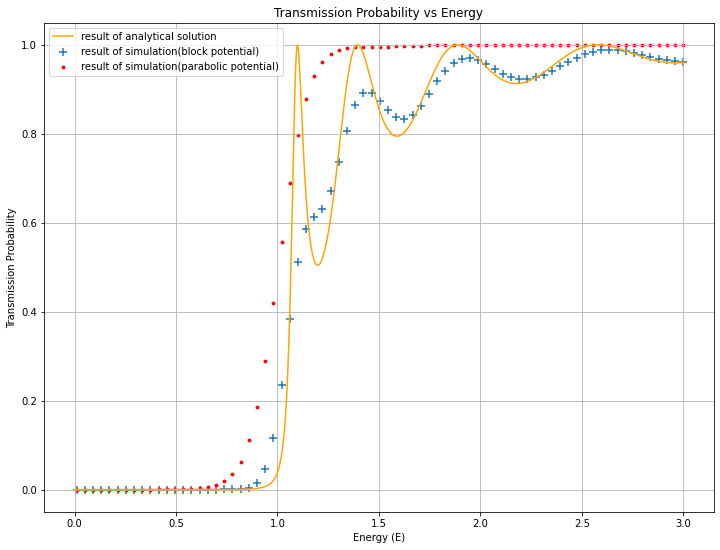

In [267]:
"""
Ploting zone for quesiton c
"""

plt.figure(figsize=(12, 9))

# anaytical result
plt.plot(energy_values, transmission_probabilities,color ='orange',label = "result of analytical solution")
plt.plot(energy_values2, transmission_probabilities2,color ='orange')
# Result of simulation
plt.scatter(energy_values3, transmission_probabilities3, s=80, marker='+',label = "result of simulation(block potential)")
plt.scatter(energy_values4, transmission_probabilities4, s=8, marker='o',color ='r',label = "result of simulation(parabolic potential)")


plt.xlabel('Energy (E)')
plt.ylabel('Transmission Probability')
plt.title('Transmission Probability vs Energy')
plt.grid(True)
plt.legend()
plt.show()

# Discussion
**for block potential:**
+ When E < V0, the transmission is caused by attempted quantum penetration，no resonance are observed.
+ When E >E0, since the wavelength of wavepacket will change with E.In some cases, the length of the potential barrier is exactly an integer multiple of the quarter-wavelength.
+ A resonance is formed inside the potential barrier, so the transmission coefficient appears to be extremely large in simulation while it will goes to 1 in theory.
+ However, this answer does not compute the point of maximum value.

**for parabolic poential:**
+ The resonance connot happen due to the change of its shape. Thus, the up and down trend disappear.
+ Since the total barrier is decreased, compared to the block potential. Is is easy for packet to pass through it. The T increases significantly when E ≈0.75eV, and goes to 1 when E ≈ 1.4eV.


**The remaining problem:**
+ This answer still not give a definitive reason has been given to explain the huge difference between theory and simulation in the block potential barrier.
